

# Assignment 1

### Table of contents

    Importing libraries
    Particle class
    Collision class
    Model 
    Task 1
    Task 2 
    Task 3 
    Task 4

In [1]:
from system_class import*
from particle_classes import*
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
writergif = animation.PillowWriter(fps=5) 
from IPython.display import HTML
plt.style.use('seaborn')
from seaborn import distplot


import warnings
warnings.filterwarnings('ignore')

##### Initial Conditions

Since the Boltzmann distribution assumes an ideal gass, the simulations in this project will make the same assumptions. Therefor the ideal gass law is used in the calculations.

In [2]:
k_b = 1.38 * 10**(-23)       #Boltzmanns constant
R = 8.3144626181532

**Van Der Waals Gass equation for hard spheres**


a = 0                          #This is the attraction constant used in Wan Der waals equation for hard sphere gass. It is zero since we are not taking into account the molecular attraction 


**Finding the neccecary constants in order to be able to compare**

In [3]:
#The Gass is a Van der Waals gass
b = 0.03186                    #This is the volume one mole of oxygen atoms take up, https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)

mean_velocity = 461.3          #Mean velocity of oxygen at zero Kelvin, [m/s] https://www.thoughtco.com/root-squmean-velocity-example-problem-607556
mu = 1.66 * 10**(-27)          #Atomic weight [kg]
m_O2 =2*16*mu                  #Weight of O2 [kg]


#Calculating the temperature used in the boltzmann distribution so that it follows the equipartition theorem in two dimensions.

T = mean_velocity**2 * m_O2/2/k_b   #The temperatur set for this simulation [Kelvin]

P = 101325                     #The pressure set for this experiment [pascal]
r_02 = 152*10**(-12)           #Radius of an oxygen atom [meters]
mol =  6.0221415 * 10**(23)    #1 mol

**Functions**


In [4]:
def Van(n): 
    return  n*b + n*R*T/P 

def boltsmann(v): 
    return m_O2*v/k_b /T * np.exp(-m_O2*v**2/2/k_b/T)

**Task 1**

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [5]:
# Initial Conditions
num_particles =2000
n = num_particles/mol      #Number of moles
V = Van(n)                        #Volume of the box as calculated from Van der Waals
x_b = y_b = V**(1/3)           #Box boundaries given in meters
elasticity = 1
tc = 0
mass = [m_O2]
radius = [r_02]


In [6]:
system_1 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)     # Initializing the system
system_1.uniform_particles()                                                            # Putting the particles in the box with a uniform distribution
system_1.find_collisions()  

In [7]:
def animate_dist(system, frames, times, name):
    def prepare_animation(bar_container):
        def animate(frame_number):
            
            if frame_number >0:
                for time in range(times):
                    system.update_step()
                system.convergence()
            vel_end = system.return_velocities()
            v = np.linspace(0,mean_velocity*3,100)
            N = sum(boltsmann(v)*(v[1]-v[0]))                     #Normalisation constant for the Boltzmann distribution
            n, _ = np.histogram(vel_end, HIST_BINS, density = True)
            ax.set_title(f'Epoch = {frame_number*times}')
            for count, rect in zip(n, bar_container.patches):
                rect.set_height(count)
            return bar_container.patches
        
        return animate
    
    fig, ax = plt.subplots()
    HIST_BINS = np.linspace(-200, 1400, 100)
    vel_end = system.return_velocities()
    v = np.linspace(0,mean_velocity*3,100)
    N = sum(boltsmann(v)*(v[1]-v[0]))                     #Normalisation constant for the Boltzmann distribution
        
    _, _, bar_container = ax.hist(vel_end, HIST_BINS, label = "vel_start" , density = True)
    plt.plot(v,boltsmann(v)/N, label = "Boltzmann Distribution" )
    ax.set_ylim(top=0.004)
    ax.set_title("Velocity distribution at the start")
    ax.set_xlabel("Velocity [m/s]")
    ax.set_ylabel("Probability")
    ax.legend()
    ani = animation.FuncAnimation(fig, prepare_animation(bar_container), frames,repeat=True, blit=True)
    plt.close()
    ani.save(name + ".gif", writer=writergif)

    return HTML(ani.to_html5_video())

<video controls src="Task1, n = 1000.git" />
os.

In [8]:
animate_dist(system_1, 70, 100, "task1_n=2000")

In [9]:
def animate_dist_m(system, frames, times, name):

    def prepare_animation(bar_container):
        def animate(frame_number):
            
            if frame_number >0:
                for time in range(times):
                    system.update_step()
                system.convergence()
            vel_end = system.return_velocities()
            vel_end_m0 = vel_end[:int(system.num_particles/2)]

            n, _ = np.histogram(vel_end_m0, HIST_BINS, density = True)
            ax.set_title(f'Epoch = {frame_number*times}')
            for count, rect in zip(n, bar_container.patches):
                rect.set_height(count)
            return bar_container.patches
        
        return animate
    
    fig, ax = plt.subplots()
    HIST_BINS = np.linspace(-200, 1400, 100)
    vel_end = system.return_velocities()
    vel_end_m0 = vel_end[:int(system.num_particles/2)]

    _, _, bar_container = ax.hist(vel_end_m0, HIST_BINS, label = "vel_start" , density = True)
    ax.set_ylim(top=0.004)
    ax.set_title("Velocity distribution for mass = m ")
    ax.set_xlabel("Velocity [m/s]")
    ax.set_ylabel("Probability")
    ax.legend()
    ani = animation.FuncAnimation(fig, prepare_animation(bar_container), frames,repeat=True, blit=True)
    plt.close()
    ani.save(name + ".gif", writer=writergif)

    return HTML(ani.to_html5_video())

In [10]:
def animate_dist_4m(system, frames, times, name):
    def prepare_animation(bar_container):
        def animate(frame_number):
            
            if frame_number >0:
                for time in range(times):
                    system.update_step()
                system.convergence()
            vel_end = system.return_velocities()
            vel_end_m0 = vel_end[int(system.num_particles/2):]

            n, _ = np.histogram(vel_end_m0, HIST_BINS, density = True)
            ax.set_title(f'Epoch = {frame_number*times}')
            for count, rect in zip(n, bar_container.patches):
                rect.set_height(count)
            return bar_container.patches
        
        return animate
    
    fig, ax = plt.subplots()
    HIST_BINS = np.linspace(-200, 1400, 100)
    vel_end = system.return_velocities()
    vel_end_m0 = vel_end[int(system.num_particles/2):]

    _, _, bar_container = ax.hist(vel_end_m0, HIST_BINS, label = "vel_start" , density = True)
    ax.set_ylim(top=0.004)
    ax.set_title("Velocity distribution for mass = m ")
    ax.set_xlabel("Velocity [m/s]")
    ax.set_ylabel("Probability")
    ax.legend()
    ani = animation.FuncAnimation(fig, prepare_animation(bar_container), frames,repeat=True, blit=True)
    plt.close()
    ani.save(name + ".gif", writer=writergif)

    return HTML(ani.to_html5_video())

**Task 2** 

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [11]:
# Initial Conditions
num_particles =2000
n = num_particles/mol      #Number of moles
V = Van(n)                        #Volume of the box as calculated from Van der Waals
x_b = y_b = V**(1/3)           #Box boundaries given in meters
elasticity = 1
tc = 0
mass = [m_O2, 4*m_O2]
radius = [r_02]

system_2 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)     # Initializing the system
system_2.uniform_particles()                                                            # Putting the particles in the box with a uniform distribution
system_2.find_collisions()  


In [12]:
animate_dist_m(system_2, 70, 100, "task2_m_n=2000")

In [13]:

system_2 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)     # Initializing the system
system_2.uniform_particles()                                                            # Putting the particles in the box with a uniform distribution
system_2.find_collisions()  

In [14]:
animate_dist_4m(system_2, 70, 100, "task2_4m_n=2000")

**Avg velocity and kinatic energy of the particles with mass equal to m02 and 4mO2.**

In [15]:
# Initial Conditions
num_particles =2000
n = num_particles/mol      #Number of moles
V = Van(n)                        #Volume of the box as calculated from Van der Waals
x_b = y_b = V**(1/3)           #Box boundaries given in meters
elasticity = 1
tc = 0
mass = [m_O2, 4*m_O2]
radius = [r_02]


times = 7000

system_2 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)     # Initializing the system
system_2.uniform_particles()                                                            # Putting the particles in the box with a uniform distribution
system_2.find_collisions()  

vel_start = system_2.return_velocities()
system_2.update(times)
vel_end = system_2.return_velocities()


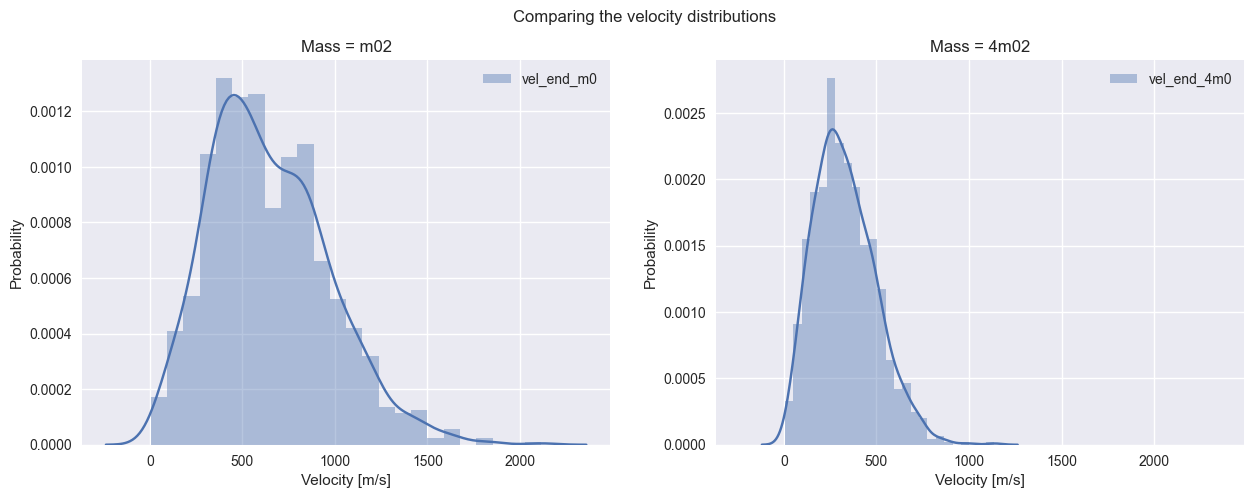

In [16]:
vel_start_m0 = vel_start[:int(system_2.num_particles/2)]
vel_start_4m0 = vel_start[int(system_2.num_particles/2):]

vel_end_m0 = vel_end[:int(system_2.num_particles/2)]
vel_end_4m0 = vel_end[int(system_2.num_particles/2):]

fig, (ax2,ax3) = plt.subplots(1,2, figsize = (15,5), sharex = True)

distplot(vel_end_m0, label = "vel_end_m0", ax = ax2)  #1000 is the number of bins we want to plot for 
ax2.set_xlabel("Velocity [m/s]")
ax2.set_ylabel("Probability")
ax2.set_title("Mass = m02")
ax2.legend()

distplot(vel_end_4m0, label = "vel_end_4m0", ax = ax3)  #1000 is the number of bins we want to plot for 
ax3.set_xlabel("Velocity [m/s]")
ax3.set_ylabel("Probability")
ax3.set_title("Mass = 4m02")
ax3.legend()


fig.suptitle( "Comparing the velocity distributions")
plt.savefig("Comparing distributions for diff mass.pdf")
plt.show()

In [17]:
times = 7000
times_it = 100
it =int( times/times_it)
system_2 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)     # Initializing the system
system_2.uniform_particles()                                                            # Putting the particles in the box with a uniform distribution
system_2.find_collisions()  
velocities = []
for i in range(times_it): 
    system_2.update(it)
    vel = system_2.return_velocities()
    velocities.append(vel)


In [18]:
vel = np.array(velocities)
vel_mo2 = vel[:, :int(num_particles/2) ]
vel_4mo2 = vel[:,int(num_particles/2) : ]

vel_mo2 = vel_mo2.mean(axis = 1)
vel_4mo2 = vel_4mo2.mean(axis =1)
epochs = np.linspace(0,times_it,times_it)*it


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


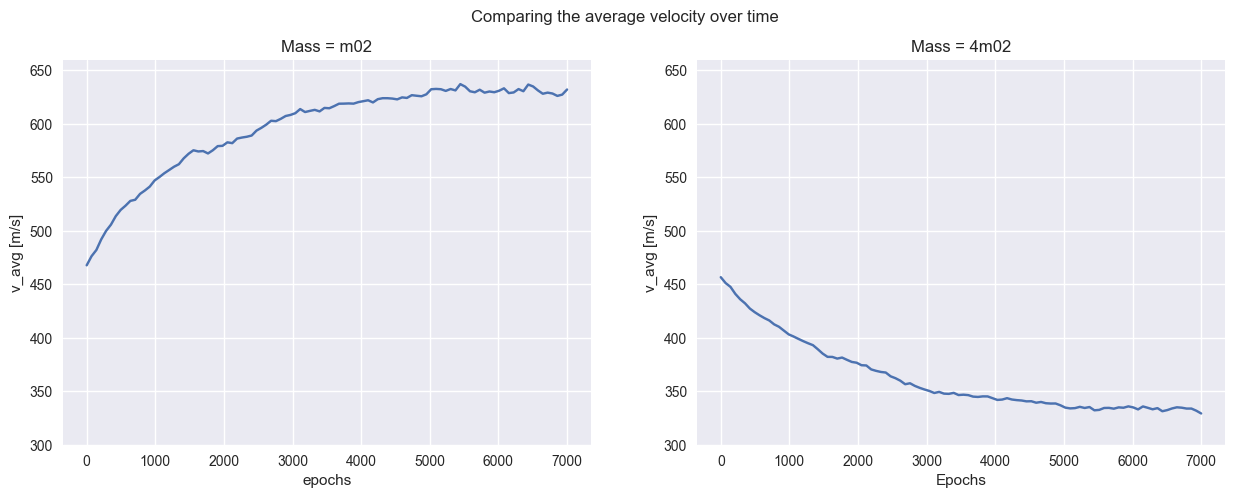

In [22]:
fig, (ax2,ax3) = plt.subplots(1,2, figsize = (15,5), sharex = True)

ax2.plot(epochs,vel_mo2)  #1000 is the number of bins we want to plot for 
ax2.set_xlabel("epochs")
ax2.set_ylabel("v_avg [m/s]")
ax2.set_title("Mass = m02")
ax2.set_ylim(300,660)
ax2.legend()

ax3.plot(epochs,vel_4mo2)  #1000 is the number of bins we want to plot for 
ax3.set_xlabel("Epochs")
ax3.set_ylabel("v_avg [m/s]")
ax3.set_title("Mass = 4m02")
ax3.set_ylim(300,660)
ax3.legend()


fig.suptitle( "Comparing the average velocity over time")
plt.savefig("Comparing the average velocity over time.pdf")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


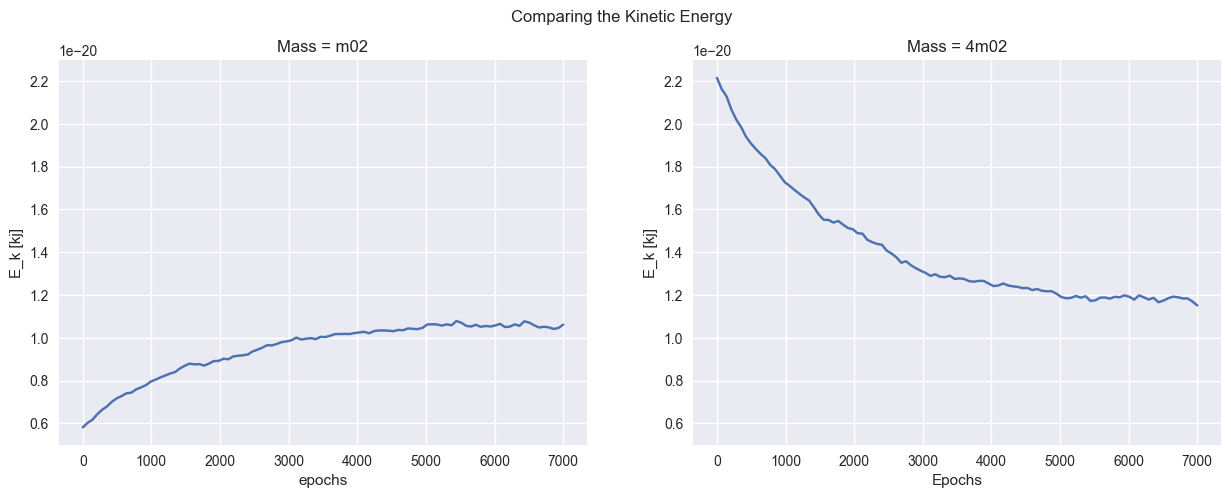

In [24]:
fig, (ax2,ax3) = plt.subplots(1,2, figsize = (15,5), sharex = True)

ax2.plot(epochs,vel_mo2**2 * m_O2/2)  #1000 is the number of bins we want to plot for 
ax2.set_xlabel("epochs")
ax2.set_ylabel("E_k [kj]")
ax2.set_title("Mass = m02")
ax2.set_ylim(0.5e-20,2.3e-20)
ax2.legend()

ax3.plot(epochs,vel_4mo2**2 * 4*m_O2/2)  #1000 is the number of bins we want to plot for 
ax3.set_xlabel("Epochs")
ax3.set_ylabel("E_k [kj]")
ax3.set_title("Mass = 4m02")
ax3.set_ylim(0.5e-20,2.3e-20)
ax3.legend()

fig.suptitle( "Comparing the Kinetic Energy")
plt.savefig("Comparing kinetic energy.pdf")
plt.show()

**Task 3**



In [25]:
# Initial Conditions
num_particles =3000
n = num_particles/mol      #Number of moles
V = Van(n)                        #Volume of the box as calculated from Van der Waals
x_b = y_b = V**(1/3)           #Box boundaries given in meters
mass = [m_O2, 4*m_O2]
radius = [r_02]

**Elasticity = 1**

In [26]:
elasticity=1
system_e_1 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc= 0)     # Initializing the system
system_e_1.uniform_particles()                                                               # Putting the particles in the box with a uniform distribution
system_e_1.find_collisions()  
avg_mO2_e_1, avg_4mO2_e_1, avg_all_e_1 = system_e_1.calculating_the_energy(number_of_updates= 4000, m_O2 = m_O2 ,average_max = 0.001, stopping_condition = 10)

**Elasticity = 0.9**

In [27]:
elasticity=0.9
system_e_09 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc= 0)     # Initializing the system
system_e_09.uniform_particles()                                                               # Putting the particles in the box with a uniform distribution
system_e_09.find_collisions()  
avg_mO2_e_09, avg_4mO2_e_09, avg_all_e_09 = system_e_09.calculating_the_energy(number_of_updates= 4000, m_O2 = m_O2 ,average_max = 0.001, stopping_condition = 10)

**Elasticity = 0.8**

In [28]:
elasticity=0.8
system_e_08 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc= 0)     # Initializing the system
system_e_08.uniform_particles()                                                               # Putting the particles in the box with a uniform distribution
system_e_08.find_collisions()  
avg_mO2_e_08, avg_4mO2_e_08, avg_all_e_08 = system_e_08.calculating_the_energy(number_of_updates= 4000, m_O2 = m_O2 ,average_max = 0.001, stopping_condition = 10)

**Ploting the results**

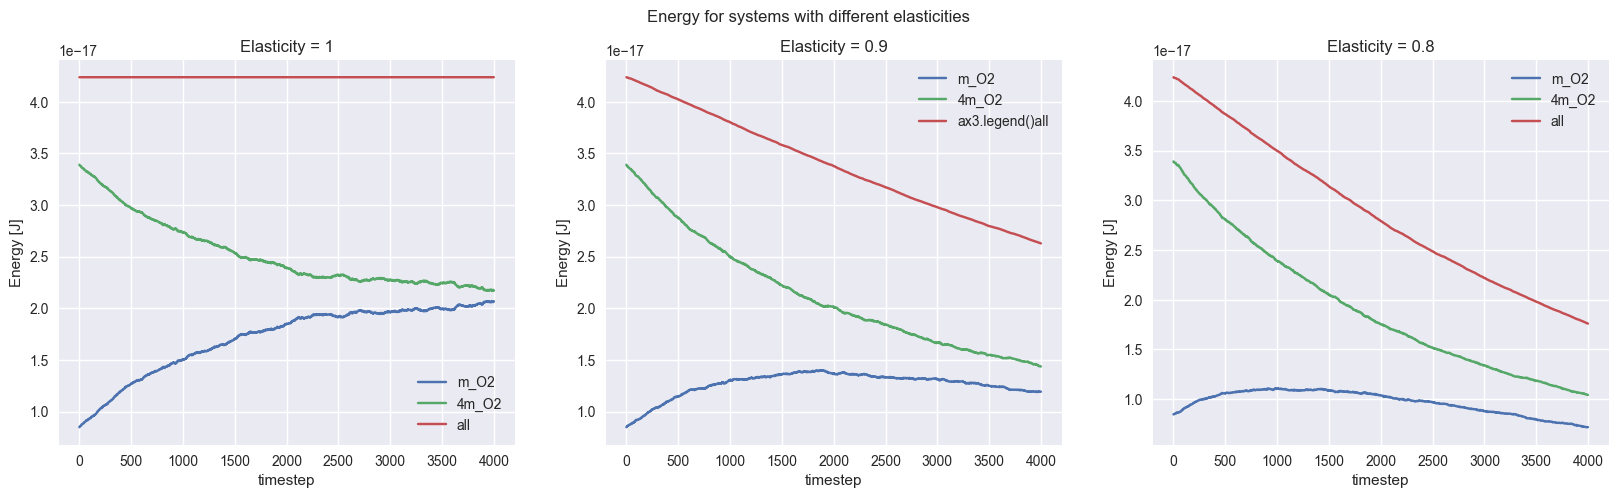

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,5))

ax1.set_title("Elasticity = 1")
ax1.plot(avg_mO2_e_1, label = "m_O2")
ax1.plot(avg_4mO2_e_1, label = "4m_O2")
ax1.plot(avg_all_e_1, label = "all")
ax1.set_xlabel("timestep")
ax1.set_ylabel("Energy [J]")
ax1.legend()

ax2.set_title("Elasticity = 0.9")
ax2.plot(avg_mO2_e_09, label = "m_O2")
ax2.plot(avg_4mO2_e_09, label = "4m_O2")
ax2.plot(avg_all_e_09, label = "ax3.legend()all")
ax2.set_xlabel("timestep")
ax2.set_ylabel("Energy [J]")
ax2.legend()

ax3.set_title("Elasticity = 0.8")
ax3.plot(avg_mO2_e_08, label = "m_O2")
ax3.plot(avg_4mO2_e_08, label = "4m_O2")
ax3.plot(avg_all_e_08, label = "all")
ax3.set_xlabel("timestep")
ax3.set_ylabel("Energy [J]")
ax3.legend()

fig.suptitle("Energy for systems with different elasticities")
plt.savefig("Energy_for_systems_with_different_elasticities.pdf")

Task 4: Crater formation

**Initial conditions**

In [ ]:
elasticity= 0.5
x_boundaries = 1
y_boundaries = 0.5
mean_velocity = 0 #m/s
mu = 1
mass=[1]
radius=[.005]
num_particles = int((x_boundaries * y_boundaries)/2/np.pi/ radius[0]**2)
tc = 0

In [ ]:
def crater(sys, times):
    x_list = []
    y_list = []

    #adding the starting positions
    x = []
    y = []
    for p in sys.particles:  
        x.append(p.position.x)
        y.append(p.position.y)
        
    x_list.append(x)
    y_list.append(y)

    times = 100
    while sys.energy()/energy_start >0.1:
        print(sys.energy()/energy_start, end = " ")
        sys.update(times)

    #adding the ending positions
    x = []
    y = []
    for p in sys.particles:  
        x.append(p.position.x)
        y.append(p.position.y)
    x_list.append(x)
    y_list.append(y)
    return x_list, y_list


In [ ]:
def plotting(x_list, y_list):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Particle evolution')

    r_list = []
    for p in system_4.particles: 
        r_list.append(p.radius)
    r_list = np.array(r_list)

    c_list = []
    for i in range(len(r_list)-1):
        c_list.append("blue")
    c_list.append("red")


    ax1.scatter(x_list[0], y_list[0], s =r_list , color = c_list)
    ax1.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))

    ax2.scatter(x_list[1], y_list[1],s =r_list, color = c_list)
    ax2.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
    return fig


In [ ]:
def size(x_list, y_list):
    x = np.array(x_list)
    y = np.array(y_list)
    return (abs(x[1,:] - x[0,:]) + abs(y[1,:] - y[0,:])).sum()


**We are scanning over the following parameters**

In [ ]:
mass_parameters = np.array([0.1,1,10,25,50]) #change this back to 0.1
speed_parameters = np.array([0.1,1,10,100,1000])*-1
radius_parameters = np.array([0.1, 1,5, 10,15])
elasticity_parameters = np.array([0.6,0.5,0.3,0.2, 0.1])

**Mass parameter scann**

In [11]:
#Runtime 12 min
size_mass = []
for proportion in mass_parameters:
    print("")
    print(f"Scanning for proportion {proportion}")
    print("Printing energy now / energy start")
    sys = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particles()
    projectile = particle(position(0.5,0.75), velocity(0, -5), 5*radius[0],proportion* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()                  #Denne tar litt tid:) 
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_mass.append(s)

NameError: name 'mass_parameters' is not defined

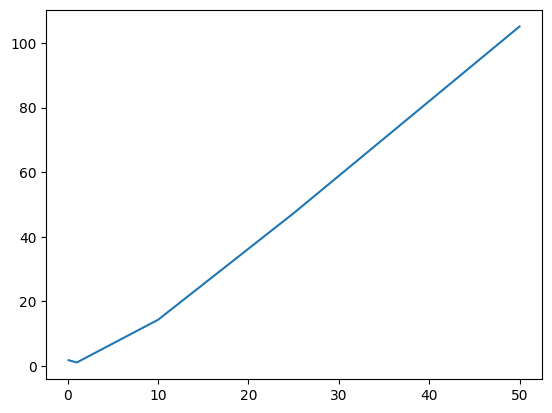

In [ ]:
plt.plot(mass_parameters, size_mass)

**Speed parameters scann**

In [ ]:
#Runtime 16 min
size_speed = []
for vel in speed_parameters:
    print("")
    print(f"Scanning for vel {vel}")
    print("Printing energy now / energy start")
    sys = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particles()
    projectile = particle(position(0.5,0.75), velocity(0, vel), 5*radius[0],25* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()         
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_speed.append(s)


Scanning for vel -0.1
Printing energy now / energy start
1.0 0.6452002736695183 0.542557947882637 0.4750395768313933 0.42587387579521685 0.41224674448982657 0.3853256633081187 0.3612968225623157 0.3421597935107265 0.3295208112786837 0.31120273951128335 0.2968778348907943 0.28541417114984835 0.27609130858201725 0.2657565376273249 0.260029136415101 0.2502036106661227 0.24082484056153264 0.2352823667086954 0.22850360551218113 0.22204327567230303 0.21560992109376176 0.20988258713187793 0.2032467183737381 0.19928238345962426 0.19609859506187788 0.1926126190220196 0.18862899578439107 0.18490777972621444 0.18231508400733568 0.17928644110281008 0.1765296633721035 0.17407547177176344 0.17189075492162145 0.16932199667279596 0.16686211700316964 0.16379818264255638 0.1615921176575978 0.15986176683662023 0.15858861788381728 0.15696681014722785 0.15529705283390688 0.15356026385532873 0.15191032483972997 0.15058544306371877 0.14840328471199052 0.14709450552473463 0.1454779864022357 0.144334485097977

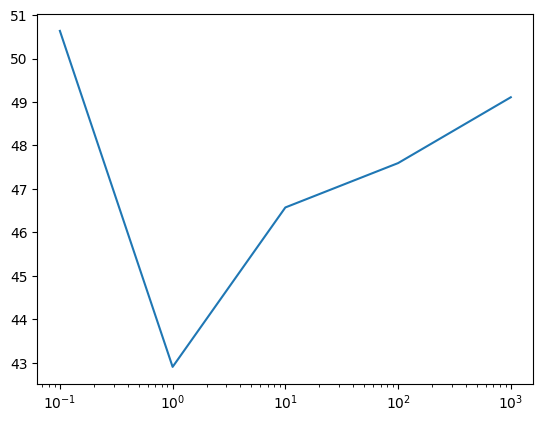

In [ ]:
fig, ax = plt.subplots()
ax.plot(speed_parameters*-1, size_speed)
ax.set_xscale("log")

**Radius parameters scann**

In [ ]:
#Runtime 13 min
size_radius = []
for r in radius_parameters:
    print("")
    print(f"Scanning for r {r}")
    print("Printing energy now / energy start")
    sys = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particles()

    projectile = particle(position(0.5,0.75), velocity(0, -5), r*radius[0],25* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()
    
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_radius.append(s)


Scanning for r 0.1
Printing energy now / energy start
1.0 0.6650157832985466 0.586908044971478 0.5397468373252011 0.47639040356319184 0.4443843108313984 0.4138327213297118 0.3760124141444588 0.32864479089086845 0.3126942037441957 0.30210229389539306 0.28912097827153227 0.28188700686741347 0.27111465956241493 0.2667121590928132 0.2619643305531752 0.25849226690968546 0.2548366742511983 0.23842864089837618 0.22844182822754197 0.22360850921499667 0.2155395366688264 0.20980798060863703 0.20453683007232756 0.19497693841827043 0.1911184570451951 0.18923703823185392 0.18620271194376162 0.18433870215349318 0.18328196733595384 0.18088709893639954 0.17768623661073762 0.1507341579246391 0.1378510676114612 0.13196580630943594 
Scanning for r 1.0
Printing energy now / energy start
1.0 0.7094345470912025 0.5808230207273142 0.511121687667019 0.455858100810587 0.41835894381413447 0.3885190005967708 0.3710905215543798 0.3509542592268036 0.3296972803484586 0.31704263598260657 0.30596559649166855 0.29597

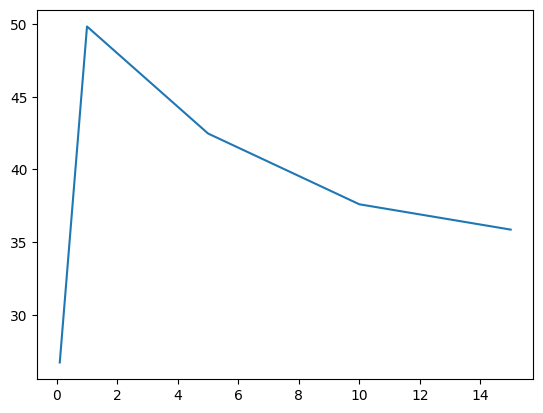

In [ ]:
plt.plot(radius_parameters, size_radius)

**Elasticity parameters scann**

In [ ]:
#runtime 30 min

size_elasticity = []
for e in elasticity_parameters:
    print("")
    print(f"Scanning for e  {e }")
    print("Printing energy now / energy start")
    sys = system(num_particles, e,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
    sys.uniform_particles()

    projectile = particle(position(0.5,0.75), velocity(0, -5), 5*radius[0],25* mass[0])
    sys.particles.append(projectile)
    sys.find_collision_projectile()
    
    energy_start = sys.energy()
    times = 100
    x_list, y_list = crater(sys, times)
    s = size(x_list, y_list)
    size_elasticity.append(s)


Scanning for e  0.6
Printing energy now / energy start
1.0 0.6298961864673898 0.5132810904319611 0.45752204261327534 0.4164589802050963 0.3822085386483347 0.3510267114605923 0.32480828243689974 0.3080390689118744 0.292797301863192 0.27998008149838977 0.2699723609758827 0.25893349193512927 0.24939903411258638 0.24086828857551063 0.2340066679820322 0.22612501821581787 0.22068907371702517 0.21567458821798574 0.21082881827367442 0.20618805262004045 0.20221668607265111 0.19718673701535816 0.1921143459137382 0.18826918581383087 0.1847146981181989 0.18074843383170483 0.17672563173888112 0.1737009641767268 0.16999717904410397 0.166955762063122 0.16384282509962367 0.16143423169711973 0.15945138962750446 0.15667543422768337 0.15469951230654955 0.1532938772757839 0.15282459705752743 0.15238635286970206 0.15024228599200995 0.14891509564790506 0.14688262490974024 0.14519452872927732 0.14380381768574663 0.14198358204763042 0.1399118351826597 0.1380240461968721 0.13651303634877554 0.1344503217582590

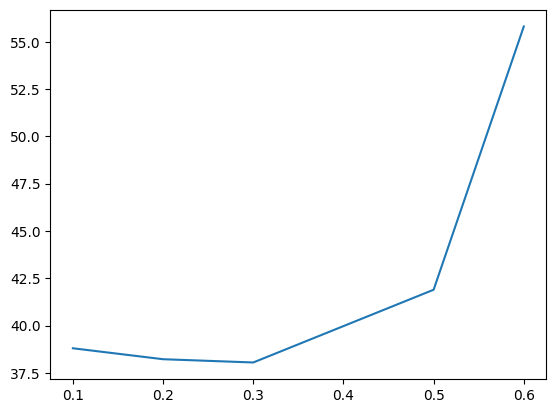

In [ ]:
plt.plot(elasticity_parameters, size_elasticity)

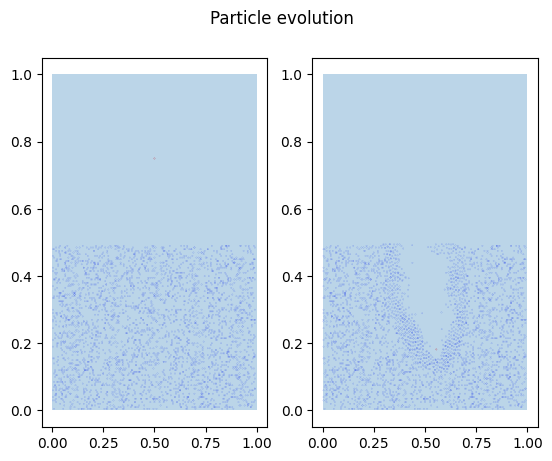

In [ ]:
fig = plotting(x_list, y_list)
plt.show()